Test SiouxFalls application generalisabilty
- tried on two Berlin networks and got the same error for both
- Chicago

# Setup: import packages

In [ ]:
#install packages if required
#%pip install networkx

In [1]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [2]:
#network_analysis_path_ben = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/pytrans_working_multiple_eq_flow'
network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\Code\Python\working_multiple_eq_flow\pytrans_working_multiple_eq_flow'
os.chdir(network_analysis_path_niamh)
import Frank_Wolfe
import TransportationNetworks as tn
#import visualize_graph

In [3]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + sep + city + '_net.tntp.txt'
        node_file_path = data_path + city + sep + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + sep + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

In [4]:
#create class
#for future iterations - redesign so it takes a city as the class
class fw_custom_algorithm():
    
    def __init__(self, cities_dict):
        self.cities_dict = cities_dict
        self.link_fields = {"from": 1, "to": 2, "capacity": 3, "length": 4, "t0": 5, "B": 6, "beta": 7, "V": 8}
    #create a csv for each city and corresponding file for investigation
 
    #need to fix this to make 
    def create_links_csv(self):
        for city in self.cities_dict.keys():
            path_list = list(self.cities_dict[city]['file_paths'])
            link_file = path_list[0]
            csv = pd.read_csv(self.cities_dict[city]['file_paths'][link_file], skiprows=7, sep='\t') #gets link file path
            trimmed= [s.strip().lower() for s in csv.columns]
            csv.columns = trimmed
            # And drop the silly first andlast columns
            csv.drop(['~', ';'], axis=1, inplace=True)
            cities_dict[city]['csv'] = csv
        self.cities_dict = cities_dict
        
    
    def plot(self, city):
        csv = self.cities_dict[city]['csv']
        network = nx.from_pandas_edgelist(csv, source = 'init node',target='term node', edge_attr = True)
        graph = nx.complete_graph(network)
        print('Graph for:', city)
        nx.draw(graph)
        
    def summary_stats_all(self):
        for city in self.cities_dict.keys():
            print('Total number of nodes in', city+':', len(self.cities_dict[city]['csv']['init node'].unique()))
            print('Total number of edges in', city+':', self.cities_dict[city]['csv'].shape[0])
            
    def make_network(self, city, remove_link_number): #remove_link_number can be None or int
        #instatiate class using required files 
        link_file = self.cities_dict[city]['file_paths']['link_file_path']
        trip_file = self.cities_dict[city]['file_paths']['trip_file_path']
        node_file = self.cities_dict[city]['file_paths']['node_file_path']
        Network = tn.Network(remove_link_number, link_file, trip_file, node_file) 
        self.cities_dict[city][str(remove_link_number)] = {'network': Network}
    
    def make_network_shut_each_link(self, city): 
        #max_edges = 10 #for a trial 
        max_edges =  self.cities_dict[city]['csv'].shape[0] #get max edges in network for a city
        #iterate over edges
        for edge in range(0, max_edges+1):
            #instatiate class for network with one file removed using required files 
            link_file = self.cities_dict[city]['file_paths']['link_file_path']
            trip_file = self.cities_dict[city]['file_paths']['trip_file_path']
            node_file = self.cities_dict[city]['file_paths']['node_file_path']
            Network = tn.Network(edge, link_file, trip_file, node_file) 
            self.cities_dict[city][str(edge)] = {'network': Network}
            
    def network_attributes(self, city, remove_link_number):
        network = self.cities_dict[city][str(remove_link_number)]['network']
        ##Network has three attributes
        #1) graph object
        graph = network.graph
        #2) origin nodes
        origin_nodes = network.origins
        #3)dict: keys= origin_node, destination_node, value = traffic flow
        flows = network.od_vols
        print(network)
        print(city, 'graph is:', graph)
        print(city, 'origin nodes are:', origin_nodes)
        print(city, 'flows are:', flows)
    
    def compute_link_flow(self, city, remove_link_number):
        network = self.cities_dict[city][str(remove_link_number)]['network']
        SO = False
        fw = Frank_Wolfe.Run(network, SO)
        #saves file to dict
        self.cities_dict[city][str(remove_link_number)]['fw_run'] = fw
        
    def eq_flow_shut_each_link(self, city):
        max_edges = len(cities_dict[city]['0']['network'].graph.edges)#get max edges in network for a city
        #max_edges = 10 #for a trial 
        #iterate over edges
        for edge in range(0, max_edges+1):
            self.compute_link_flow(city, edge)
    
            

            
        



# Set file paths

In [12]:
data_path = 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\' #person specific
cities = ['ChicagoSketch'] #this needs to be a list even if it is only one network
data_path = data_path 
os.chdir(data_path)

# Make dict

In [13]:
sep = '\\' #user specific (i.e. mac or windows based)

In [14]:
cities_dict = make_dict(cities)
cities_dict

{'ChicagoSketch': {'file_paths': {'link_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\ChicagoSketch\\ChicagoSketch_net.tntp.txt',
   'node_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\ChicagoSketch\\ChicagoSketch_nodes.tntp.txt',
   'trip_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\ChicagoSketch\\ChicagoSketch_trips.tntp.txt'}}}

# instantiate class

In [15]:
#instantiate class 
trial_run = fw_custom_algorithm(cities_dict)

# Observe one city

In [16]:
#set city for investigation
city = cities[0] #in this case the one and only element of the list

In [17]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,547,49500,0.86267,0.00,0.15,4,0,0,3
1,2,548,49500,0.86267,0.00,0.15,4,0,0,3
2,3,549,49500,0.86267,0.00,0.15,4,0,0,3
3,4,550,49500,0.86267,0.00,0.15,4,0,0,3
4,5,551,49500,0.86267,0.00,0.15,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2945,931,906,500,22.65430,14.78,0.15,4,0,0,1
2946,932,386,49500,0.86267,0.00,0.15,4,0,0,3
2947,932,515,5000,10.44260,5.93,0.15,4,0,0,2
2948,933,387,49500,0.86267,0.00,0.15,4,0,0,3


# Plot graph

In [19]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

KeyError: 'init node'

# Observe example network data

In [20]:
#observe network with all links
remove_link = 0 #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

ChicagoSketch graph is: DiGraph with 933 nodes and 2950 edges
ChicagoSketch origin nodes are: []
ChicagoSketch flows are: {}


In [21]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

ChicagoSketch graph is: DiGraph with 933 nodes and 2949 edges
ChicagoSketch origin nodes are: []
ChicagoSketch flows are: {}


# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [22]:
#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

Results for: ChicagoSketch
1  ->  547 :  0.0
547  ->  1 :  0.0
547  ->  548 :  0.0
547  ->  549 :  0.0
547  ->  621 :  0.0
2  ->  548 :  0.0
548  ->  2 :  0.0
548  ->  547 :  0.0
548  ->  550 :  0.0
548  ->  552 :  0.0
548  ->  618 :  0.0
3  ->  549 :  0.0
549  ->  3 :  0.0
549  ->  547 :  0.0
549  ->  550 :  0.0
549  ->  551 :  0.0
4  ->  550 :  0.0
550  ->  4 :  0.0
550  ->  548 :  0.0
550  ->  549 :  0.0
550  ->  551 :  0.0
550  ->  552 :  0.0
550  ->  553 :  0.0
550  ->  560 :  0.0
5  ->  551 :  0.0
551  ->  5 :  0.0
551  ->  495 :  0.0
551  ->  549 :  0.0
551  ->  550 :  0.0
551  ->  563 :  0.0
6  ->  552 :  0.0
552  ->  6 :  0.0
552  ->  435 :  0.0
552  ->  548 :  0.0
552  ->  550 :  0.0
552  ->  553 :  0.0
552  ->  618 :  0.0
552  ->  619 :  0.0
7  ->  553 :  0.0
553  ->  7 :  0.0
553  ->  496 :  0.0
553  ->  550 :  0.0
553  ->  552 :  0.0
553  ->  560 :  0.0
8  ->  554 :  0.0
554  ->  8 :  0.0
554  ->  435 :  0.0
554  ->  437 :  0.0
554  ->  614 :  0.0
554  ->  619 :  0.0
554  

660  ->  582 :  0.0
660  ->  656 :  0.0
660  ->  661 :  0.0
660  ->  902 :  0.0
115  ->  661 :  0.0
661  ->  115 :  0.0
661  ->  512 :  0.0
661  ->  658 :  0.0
661  ->  660 :  0.0
661  ->  902 :  0.0
116  ->  662 :  0.0
662  ->  116 :  0.0
662  ->  449 :  0.0
662  ->  654 :  0.0
662  ->  664 :  0.0
662  ->  667 :  0.0
117  ->  663 :  0.0
663  ->  117 :  0.0
663  ->  449 :  0.0
663  ->  655 :  0.0
663  ->  665 :  0.0
663  ->  841 :  0.0
118  ->  664 :  0.0
664  ->  118 :  0.0
664  ->  448 :  0.0
664  ->  662 :  0.0
664  ->  669 :  0.0
664  ->  849 :  0.0
119  ->  665 :  0.0
665  ->  119 :  0.0
665  ->  448 :  0.0
665  ->  663 :  0.0
665  ->  843 :  0.0
665  ->  849 :  0.0
120  ->  666 :  0.0
666  ->  120 :  0.0
666  ->  510 :  0.0
666  ->  521 :  0.0
666  ->  667 :  0.0
666  ->  668 :  0.0
121  ->  667 :  0.0
667  ->  121 :  0.0
667  ->  509 :  0.0
667  ->  662 :  0.0
667  ->  666 :  0.0
667  ->  669 :  0.0
122  ->  668 :  0.0
668  ->  122 :  0.0
668  ->  519 :  0.0
668  ->  666 :  0.0


215  ->  761 :  0.0
761  ->  215 :  0.0
761  ->  757 :  0.0
761  ->  759 :  0.0
761  ->  760 :  0.0
761  ->  770 :  0.0
216  ->  762 :  0.0
762  ->  216 :  0.0
762  ->  422 :  0.0
762  ->  753 :  0.0
762  ->  763 :  0.0
762  ->  764 :  0.0
217  ->  763 :  0.0
763  ->  217 :  0.0
763  ->  754 :  0.0
763  ->  758 :  0.0
763  ->  762 :  0.0
763  ->  765 :  0.0
218  ->  764 :  0.0
764  ->  218 :  0.0
764  ->  423 :  0.0
764  ->  762 :  0.0
764  ->  765 :  0.0
764  ->  773 :  0.0
219  ->  765 :  0.0
765  ->  219 :  0.0
765  ->  760 :  0.0
765  ->  763 :  0.0
765  ->  764 :  0.0
765  ->  774 :  0.0
220  ->  766 :  0.0
766  ->  220 :  0.0
766  ->  422 :  0.0
766  ->  756 :  0.0
766  ->  767 :  0.0
221  ->  767 :  0.0
767  ->  221 :  0.0
767  ->  423 :  0.0
767  ->  766 :  0.0
767  ->  777 :  0.0
222  ->  768 :  0.0
768  ->  222 :  0.0
768  ->  584 :  0.0
768  ->  757 :  0.0
768  ->  770 :  0.0
768  ->  772 :  0.0
768  ->  808 :  0.0
223  ->  769 :  0.0
769  ->  223 :  0.0
769  ->  760 :  0.0


862  ->  316 :  0.0
862  ->  465 :  0.0
862  ->  466 :  0.0
862  ->  863 :  0.0
862  ->  889 :  0.0
317  ->  863 :  0.0
863  ->  317 :  0.0
863  ->  856 :  0.0
863  ->  862 :  0.0
863  ->  885 :  0.0
863  ->  890 :  0.0
318  ->  864 :  0.0
864  ->  318 :  0.0
864  ->  732 :  0.0
864  ->  865 :  0.0
864  ->  867 :  0.0
864  ->  913 :  0.0
319  ->  865 :  0.0
865  ->  319 :  0.0
865  ->  733 :  0.0
865  ->  864 :  0.0
865  ->  866 :  0.0
865  ->  868 :  0.0
320  ->  866 :  0.0
866  ->  320 :  0.0
866  ->  736 :  0.0
866  ->  737 :  0.0
866  ->  810 :  0.0
866  ->  812 :  0.0
866  ->  865 :  0.0
866  ->  868 :  0.0
866  ->  869 :  0.0
321  ->  867 :  0.0
867  ->  321 :  0.0
867  ->  864 :  0.0
867  ->  868 :  0.0
867  ->  870 :  0.0
322  ->  868 :  0.0
868  ->  322 :  0.0
868  ->  865 :  0.0
868  ->  866 :  0.0
868  ->  867 :  0.0
868  ->  869 :  0.0
868  ->  871 :  0.0
323  ->  869 :  0.0
869  ->  323 :  0.0
869  ->  818 :  0.0
869  ->  820 :  0.0
869  ->  866 :  0.0
869  ->  868 :  0.0


467  ->  855 :  0.0
468  ->  458 :  0.0
468  ->  469 :  0.0
468  ->  829 :  0.0
468  ->  830 :  0.0
460  ->  459 :  0.0
460  ->  461 :  0.0
460  ->  872 :  0.0
460  ->  875 :  0.0
461  ->  460 :  0.0
461  ->  462 :  0.0
461  ->  874 :  0.0
461  ->  877 :  0.0
462  ->  461 :  0.0
462  ->  873 :  0.0
462  ->  876 :  0.0
462  ->  927 :  0.0
463  ->  464 :  0.0
463  ->  928 :  0.0
464  ->  463 :  0.0
464  ->  465 :  0.0
464  ->  883 :  0.0
464  ->  884 :  0.0
465  ->  464 :  0.0
465  ->  466 :  0.0
465  ->  862 :  0.0
465  ->  881 :  0.0
466  ->  465 :  0.0
466  ->  467 :  0.0
466  ->  855 :  0.0
466  ->  862 :  0.0
469  ->  468 :  0.0
469  ->  470 :  0.0
469  ->  819 :  0.0
469  ->  824 :  0.0
470  ->  469 :  0.0
470  ->  471 :  0.0
470  ->  817 :  0.0
470  ->  822 :  0.0
471  ->  470 :  0.0
471  ->  472 :  0.0
471  ->  815 :  0.0
471  ->  816 :  0.0
472  ->  471 :  0.0
472  ->  473 :  0.0
472  ->  813 :  0.0
472  ->  815 :  0.0
473  ->  472 :  0.0
473  ->  474 :  0.0
473  ->  475 :  0.0


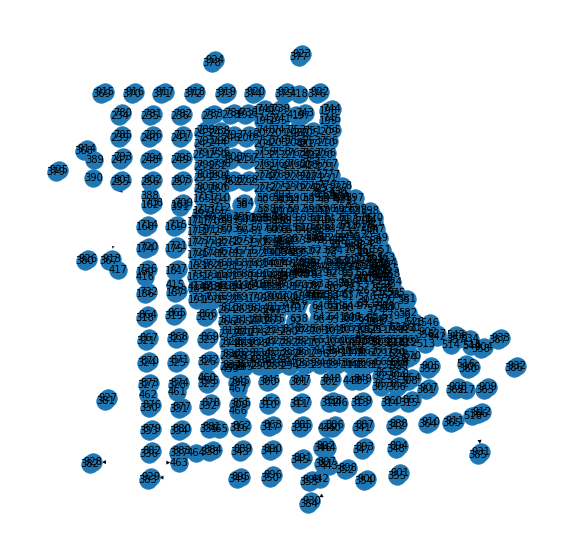

In [23]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Compute equilibrium flow for one closed link in example city using Frank-Wolfe algorithm

In [ ]:
#compute the eq flow for one example city and one closed link
remove_link = 1
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and one closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
#view a network with edge removed
removed_link = 8
trial_run.make_network(city, removed_link)
trial_run.network_attributes(city, removed_link)

In [ ]:
trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

In [ ]:
## for below analysis, remember that the removed_link = 1 means the last row in the trip file is removed. 
# Removed_link = 2 means the second last row is removed, and so on.
# You can use this for the mapping from fw eq flow results to the csv/dataframe.


removed_link = 0
#density
nx.density(cities_dict[city][str(remove_link)]['network'].graph)

#diameter
nx.diameter(cities_dict[city][str(remove_link)]['network'].graph)

#check this out for centrality https://networkx.org/documentation/stable/reference/algorithms/centrality.html

#betweeness origin

#eigenvector origin

#betweeness destination

#eigenvector destination

#flow - from initial trips file i think 

#cost - will need to compute